<a href="https://colab.research.google.com/github/LukeSchreiber/FastAI-Projects/blob/main/Dog_or_human_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings #warnings to stop the spam
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
# installs (run once per fresh runtime)
!pip -q install -U fastai fastdownload ddgs

from fastai.vision.all import *
from fastcore.all import *
from ddgs import DDGS

def search_images(query, max_images=200):
    with DDGS() as ddgs:
        return L(ddgs.images(query=query, max_results=max_images)).itemgot('image')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18

In [ ]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [ ]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')


The two things ontop of week 1 fast.ai - making sure that my notebook here runs smoothly as this is my first notebook.

In [ ]:
urls = search_images('Dog photos', max_images=1)
urls[0]


'http://2.bp.blogspot.com/-F7nf-gBRWv4/Uj_ztbmo9lI/AAAAAAAAFwU/D_NRsx_lBEY/s1600/Cute-Dog.jpg'

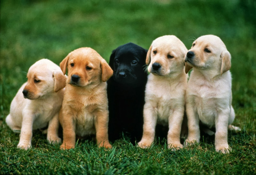

In [ ]:
from fastdownload import download_url
dest = 'dog_url'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

downloaded URL of the dog image

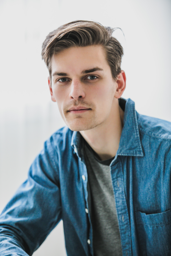

In [ ]:
download_url(search_images('person photo', max_images=1)[0], 'person.jpg', show_progress=False)
Image.open('person.jpg').to_thumb(256,256)

In [ ]:

searches = 'person','dog'
path = Path('dog_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

this is make the directory whwere hte images will be stored and download the images in.


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

if the image failes to download we remove


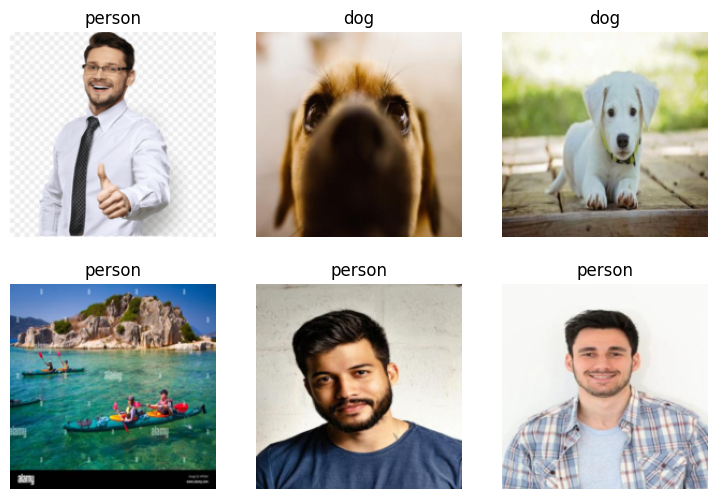

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Making the data loader

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,0.863263,1.093943,0.324324,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.192861,0.458274,0.135135,00:00
1,0.137593,0.250346,0.027027,00:00
2,0.103269,0.218234,0.027027,00:00
3,0.087499,0.216336,0.027027,00:00
4,0.069159,0.214119,0.027027,00:00
5,0.056887,0.214553,0.027027,00:00
6,0.049024,0.231480,0.027027,00:01
7,0.041749,0.229903,0.027027,00:01
8,0.036128,0.228045,0.027027,00:00
9,0.031113,0.225280,0.027027,00:00


train the model using simple fastai functions


In [ ]:
is_dog,_,probs = learn.predict(PILImage.create('dog_url'))
print(f"This is a: {is_dog}.")
print(f"Probability it's a dog: {probs[0]:.4f}")

NameError: name 'learn' is not defined